In [1]:
!pip install tensorflow
!pip install tensorflow-gpu 
!pip install opencv
!pip install mediapipe 
!pip install sklearn 


  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.40.0
    Uninstalling grpcio-1.40.0:
      Successfully uninstalled grpcio-1.40.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires grpcio<2.0,>=1.37.0, but you have grpcio 1.34.1 which is incompatible.
tensorflow-gpu 2.6.0 requires tensorflow-estimator~=2.6, but you have tensorflow-estimator 2.5.0 which is incompatible.


  Using cached grpcio-1.40.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires grpcio~=1.34.0, but you have grpcio 1.40.0 which is incompatible.
tensorflow 2.5.0 requires tensorflow-estimator<2.6.0,>=2.5.0rc0, but you have tensorflow-estimator 2.6.0 which is incompatible.


  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.13.0
alabaster                          0.7.12
altair                             4.1.0
anaconda-client                    1.7.2
anaconda-navigator                 2.0.4
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
APScheduler                        3.7.0
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astor                              0.8.1
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.6
autoviz                            0.0.84
Babel                              2.9

In [4]:
pip install python==3.8

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python==3.8 (from versions: none)
ERROR: No matching distribution found for python==3.8


In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

In [6]:
mp_holistic = mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [7]:
def mediapipe_detection(image, model):
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable =False
    result = model.process(image)
    image.flags.writeable =True
    image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, result

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap= cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():
        ret, frame= cap.read()

        image,results= mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landwarks
        draw_landmarks(image, results)
        
        #show to screen
        cv2.imshow('OpenCv Feed', image)

        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
results.left_hand_landmarks

In [12]:
draw_landmarks(frame, results)

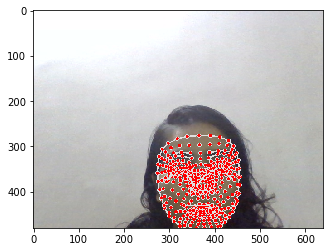

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [14]:
results.pose_landmarks.landmark[0].visibility

0.9947568774223328

In [15]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
len(pose)

33

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)[:-10]

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [21]:
face

array([ 0.58908361,  0.89279771, -0.04043411, ...,  0.67506397,
        0.70949638,  0.02579703])

In [22]:
468*3+33*4+21*3+21*3

1662

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.56054509,  0.81577241, -1.50580919, ...,  0.        ,
        0.        ,  0.        ])

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


In [26]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


In [27]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()



In [28]:

cap.release()
cv2.destroyAllWindows()

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}


In [31]:
label_map


{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [33]:
np.array(sequences).shape

(90, 30, 1662)

In [34]:

np.array(labels).shape

(90,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(90, 30, 1662)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(5, 3)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [42]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [59]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [60]:
res = [.7, 0.2, 0.1]

In [61]:
actions[np.argmax(res)]

'hello'

In [62]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [63]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 7s 2s/step - loss: 8.2100 - categorical_accuracy: 0.3366
Epoch 2/2000
3/3 [==============================] - 0s 65ms/step - loss: 17.0499 - categorical_accuracy: 0.3601
Epoch 3/2000
3/3 [==============================] - 0s 68ms/step - loss: 23.5821 - categorical_accuracy: 0.4011
Epoch 4/2000
3/3 [==============================] - 0s 63ms/step - loss: 21.1014 - categorical_accuracy: 0.3151
Epoch 5/2000
3/3 [==============================] - 0s 61ms/step - loss: 30.8034 - categorical_accuracy: 0.3307
Epoch 6/2000
3/3 [==============================] - 0s 62ms/step - loss: 51.7685 - categorical_accuracy: 0.2994
Epoch 7/2000
3/3 [==============================] - 0s 61ms/step - loss: 50.0111 - categorical_accuracy: 0.3465
Epoch 8/2000
3/3 [==============================] - 0s 60ms/step - loss: 31.0227 - categorical_accuracy: 0.4129
Epoch 9/2000
3/3 [==============================] - 0s 60ms/step - loss: 45.7579 - categorical_accuracy: 0.

3/3 [==============================] - 0s 62ms/step - loss: 15.5073 - categorical_accuracy: 0.3366
Epoch 74/2000
3/3 [==============================] - 0s 60ms/step - loss: 9.4318 - categorical_accuracy: 0.2935
Epoch 75/2000
3/3 [==============================] - 0s 59ms/step - loss: 14.2537 - categorical_accuracy: 0.3268
Epoch 76/2000
3/3 [==============================] - 0s 58ms/step - loss: 19.7085 - categorical_accuracy: 0.3150
Epoch 77/2000
3/3 [==============================] - 0s 58ms/step - loss: 15.3645 - categorical_accuracy: 0.3073
Epoch 78/2000
3/3 [==============================] - 0s 57ms/step - loss: 25.0828 - categorical_accuracy: 0.3738
Epoch 79/2000
3/3 [==============================] - 0s 63ms/step - loss: 48.4292 - categorical_accuracy: 0.3504
Epoch 80/2000
3/3 [==============================] - 0s 66ms/step - loss: 65.7944 - categorical_accuracy: 0.3504
Epoch 81/2000
3/3 [==============================] - 0s 63ms/step - loss: 18.3191 - categorical_accuracy: 0.248

3/3 [==============================] - 0s 62ms/step - loss: 1.6183 - categorical_accuracy: 0.4246
Epoch 146/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.5317 - categorical_accuracy: 0.3327
Epoch 147/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2990 - categorical_accuracy: 0.4207
Epoch 148/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.5776 - categorical_accuracy: 0.4266
Epoch 149/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.6766 - categorical_accuracy: 0.3855
Epoch 150/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.9371 - categorical_accuracy: 0.3855
Epoch 151/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.7691 - categorical_accuracy: 0.3953
Epoch 152/2000
3/3 [==============================] - 0s 59ms/step - loss: 5.1013 - categorical_accuracy: 0.3425
Epoch 153/2000
3/3 [==============================] - 0s 61ms/step - loss: 6.1365 - categorical_accuracy: 0.379

3/3 [==============================] - 0s 61ms/step - loss: 1.9480 - categorical_accuracy: 0.3151
Epoch 218/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.0495 - categorical_accuracy: 0.3561
Epoch 219/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.9641 - categorical_accuracy: 0.3855
Epoch 220/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.3335 - categorical_accuracy: 0.3386
Epoch 221/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1908 - categorical_accuracy: 0.4246
Epoch 222/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1640 - categorical_accuracy: 0.5127
Epoch 223/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.3851 - categorical_accuracy: 0.4031
Epoch 224/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.0217 - categorical_accuracy: 0.2407
Epoch 225/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.7456 - categorical_accuracy: 0.338

3/3 [==============================] - 0s 65ms/step - loss: 2.1655 - categorical_accuracy: 0.4383
Epoch 290/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.0890 - categorical_accuracy: 0.3073
Epoch 291/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.7737 - categorical_accuracy: 0.3620
Epoch 292/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.9706 - categorical_accuracy: 0.3738
Epoch 293/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7080 - categorical_accuracy: 0.3328
Epoch 294/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.4231 - categorical_accuracy: 0.3679
Epoch 295/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.3870 - categorical_accuracy: 0.4325
Epoch 296/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.4148 - categorical_accuracy: 0.3465
Epoch 297/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.5999 - categorical_accuracy: 0.399

3/3 [==============================] - 0s 62ms/step - loss: 1.9143 - categorical_accuracy: 0.3836
Epoch 362/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.9710 - categorical_accuracy: 0.3796
Epoch 363/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.1081 - categorical_accuracy: 0.3445
Epoch 364/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.2089 - categorical_accuracy: 0.3953
Epoch 365/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.2264 - categorical_accuracy: 0.4481
Epoch 366/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1276 - categorical_accuracy: 0.5263
Epoch 367/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1634 - categorical_accuracy: 0.4931
Epoch 368/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.3317 - categorical_accuracy: 0.4364
Epoch 369/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1271 - categorical_accuracy: 0.467

3/3 [==============================] - 0s 59ms/step - loss: 2.4051 - categorical_accuracy: 0.4129
Epoch 434/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.6138 - categorical_accuracy: 0.3817
Epoch 435/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.5394 - categorical_accuracy: 0.4716
Epoch 436/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.4623 - categorical_accuracy: 0.4110
Epoch 437/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0446 - categorical_accuracy: 0.5087
Epoch 438/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1340 - categorical_accuracy: 0.4619
Epoch 439/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.2311 - categorical_accuracy: 0.4188
Epoch 440/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1001 - categorical_accuracy: 0.5264
Epoch 441/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1240 - categorical_accuracy: 0.379

3/3 [==============================] - 0s 69ms/step - loss: 2.1476 - categorical_accuracy: 0.3503
Epoch 506/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.8419 - categorical_accuracy: 0.4149
Epoch 507/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.9628 - categorical_accuracy: 0.3777
Epoch 508/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.0458 - categorical_accuracy: 0.4461
Epoch 509/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7814 - categorical_accuracy: 0.3405
Epoch 510/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.9988 - categorical_accuracy: 0.4755
Epoch 511/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.6342 - categorical_accuracy: 0.2760
Epoch 512/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.9141 - categorical_accuracy: 0.4403
Epoch 513/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.2143 - categorical_accuracy: 0.381

3/3 [==============================] - 0s 60ms/step - loss: 1.0501 - categorical_accuracy: 0.4403
Epoch 578/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.2008 - categorical_accuracy: 0.4580
Epoch 579/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.1605 - categorical_accuracy: 0.4090
Epoch 580/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.2912 - categorical_accuracy: 0.3464
Epoch 581/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7759 - categorical_accuracy: 0.2740
Epoch 582/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1844 - categorical_accuracy: 0.4735
Epoch 583/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1857 - categorical_accuracy: 0.4344
Epoch 584/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.3159 - categorical_accuracy: 0.4109
Epoch 585/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1779 - categorical_accuracy: 0.440

3/3 [==============================] - 0s 64ms/step - loss: 1.2728 - categorical_accuracy: 0.4520
Epoch 650/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.6789 - categorical_accuracy: 0.3582
Epoch 651/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.6414 - categorical_accuracy: 0.4501
Epoch 652/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.2150 - categorical_accuracy: 0.4247
Epoch 653/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1967 - categorical_accuracy: 0.4756
Epoch 654/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0797 - categorical_accuracy: 0.4834
Epoch 655/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1978 - categorical_accuracy: 0.5264
Epoch 656/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1697 - categorical_accuracy: 0.4423
Epoch 657/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.3610 - categorical_accuracy: 0.352

3/3 [==============================] - 0s 63ms/step - loss: 1.4648 - categorical_accuracy: 0.3973
Epoch 722/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7450 - categorical_accuracy: 0.3816
Epoch 723/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.3625 - categorical_accuracy: 0.4403
Epoch 724/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.3601 - categorical_accuracy: 0.3797
Epoch 725/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.6223 - categorical_accuracy: 0.3659
Epoch 726/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1776 - categorical_accuracy: 0.5538
Epoch 727/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0683 - categorical_accuracy: 0.4344
Epoch 728/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.3139 - categorical_accuracy: 0.4638
Epoch 729/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.2439 - categorical_accuracy: 0.330

3/3 [==============================] - 0s 62ms/step - loss: 1.2823 - categorical_accuracy: 0.4110
Epoch 794/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1410 - categorical_accuracy: 0.5714
Epoch 795/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.2062 - categorical_accuracy: 0.4345
Epoch 796/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.2154 - categorical_accuracy: 0.4775
Epoch 797/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.1770 - categorical_accuracy: 0.5010
Epoch 798/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.5472 - categorical_accuracy: 0.4814
Epoch 799/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.7889 - categorical_accuracy: 0.4384
Epoch 800/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.6239 - categorical_accuracy: 0.4599
Epoch 801/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.2903 - categorical_accuracy: 0.465

3/3 [==============================] - 0s 60ms/step - loss: 0.9941 - categorical_accuracy: 0.5401
Epoch 866/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.3443 - categorical_accuracy: 0.4658
Epoch 867/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1553 - categorical_accuracy: 0.5303
Epoch 868/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9936 - categorical_accuracy: 0.5401
Epoch 869/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0217 - categorical_accuracy: 0.5753
Epoch 870/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.9982 - categorical_accuracy: 0.5831
Epoch 871/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9108 - categorical_accuracy: 0.6379
Epoch 872/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9188 - categorical_accuracy: 0.6145
Epoch 873/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0033 - categorical_accuracy: 0.588

3/3 [==============================] - 0s 61ms/step - loss: 1.4859 - categorical_accuracy: 0.4716
Epoch 938/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.2448 - categorical_accuracy: 0.4482
Epoch 939/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0239 - categorical_accuracy: 0.5303
Epoch 940/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.8657 - categorical_accuracy: 0.5753
Epoch 941/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.9373 - categorical_accuracy: 0.6086
Epoch 942/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8284 - categorical_accuracy: 0.6653
Epoch 943/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.8938 - categorical_accuracy: 0.6419
Epoch 944/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8109 - categorical_accuracy: 0.6693
Epoch 945/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9982 - categorical_accuracy: 0.536

3/3 [==============================] - 0s 68ms/step - loss: 0.8280 - categorical_accuracy: 0.6790
Epoch 1010/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8473 - categorical_accuracy: 0.5636
Epoch 1011/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.7654 - categorical_accuracy: 0.6301
Epoch 1012/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8351 - categorical_accuracy: 0.6614
Epoch 1013/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.8173 - categorical_accuracy: 0.6438
Epoch 1014/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.8212 - categorical_accuracy: 0.6692
Epoch 1015/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0781 - categorical_accuracy: 0.5871
Epoch 1016/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9160 - categorical_accuracy: 0.5401
Epoch 1017/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0626 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.8542 - categorical_accuracy: 0.6438
Epoch 1082/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9262 - categorical_accuracy: 0.5910
Epoch 1083/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.7598 - categorical_accuracy: 0.6517
Epoch 1084/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8529 - categorical_accuracy: 0.6594
Epoch 1085/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9821 - categorical_accuracy: 0.5734
Epoch 1086/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0106 - categorical_accuracy: 0.5498
Epoch 1087/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0359 - categorical_accuracy: 0.6027
Epoch 1088/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.9202 - categorical_accuracy: 0.5890
Epoch 1089/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9730 - categorical_accurac

3/3 [==============================] - 0s 69ms/step - loss: 0.5929 - categorical_accuracy: 0.7514
Epoch 1154/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6285 - categorical_accuracy: 0.7867
Epoch 1155/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6302 - categorical_accuracy: 0.7476
Epoch 1156/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6905 - categorical_accuracy: 0.7143
Epoch 1157/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.6899 - categorical_accuracy: 0.6909
Epoch 1158/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.5556 - categorical_accuracy: 0.7808
Epoch 1159/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.6114 - categorical_accuracy: 0.7808
Epoch 1160/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.5706 - categorical_accuracy: 0.8160
Epoch 1161/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6355 - categorical_accurac

Epoch 1225/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1796 - categorical_accuracy: 0.4246
Epoch 1226/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1909 - categorical_accuracy: 0.3171
Epoch 1227/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1428 - categorical_accuracy: 0.3816
Epoch 1228/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1285 - categorical_accuracy: 0.4637
Epoch 1229/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.1545 - categorical_accuracy: 0.4168
Epoch 1230/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.1679 - categorical_accuracy: 0.4598
Epoch 1231/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.3927 - categorical_accuracy: 0.3209
Epoch 1232/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.4101 - categorical_accuracy: 0.4011
Epoch 1233/2000
3/3 [==============================] - 0s 61ms/step - loss: 14.7718 - ca

3/3 [==============================] - 0s 58ms/step - loss: 1.2812 - categorical_accuracy: 0.2369
Epoch 1297/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.3391 - categorical_accuracy: 0.3699
Epoch 1298/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0784 - categorical_accuracy: 0.3973
Epoch 1299/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.2012 - categorical_accuracy: 0.3346
Epoch 1300/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1854 - categorical_accuracy: 0.5108
Epoch 1301/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9923 - categorical_accuracy: 0.5420
Epoch 1302/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1569 - categorical_accuracy: 0.3229
Epoch 1303/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1133 - categorical_accuracy: 0.3698
Epoch 1304/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0564 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 1.1177 - categorical_accuracy: 0.4324
Epoch 1368/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1644 - categorical_accuracy: 0.3640
Epoch 1369/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0965 - categorical_accuracy: 0.3602
Epoch 1370/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0862 - categorical_accuracy: 0.4990
Epoch 1371/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1183 - categorical_accuracy: 0.3112
Epoch 1372/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0946 - categorical_accuracy: 0.4599
Epoch 1373/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.1436 - categorical_accuracy: 0.3230
Epoch 1374/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0715 - categorical_accuracy: 0.3464
Epoch 1375/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1046 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 1.2593 - categorical_accuracy: 0.3933
Epoch 1440/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0797 - categorical_accuracy: 0.3660
Epoch 1441/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.1316 - categorical_accuracy: 0.4208
Epoch 1442/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.2907 - categorical_accuracy: 0.3034
Epoch 1443/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.2215 - categorical_accuracy: 0.4775
Epoch 1444/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1858 - categorical_accuracy: 0.3191
Epoch 1445/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.2130 - categorical_accuracy: 0.3386
Epoch 1446/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.0911 - categorical_accuracy: 0.2369
Epoch 1447/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1311 - categorical_accurac

3/3 [==============================] - 0s 57ms/step - loss: 1.1559 - categorical_accuracy: 0.3581
Epoch 1512/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.2435 - categorical_accuracy: 0.4423
Epoch 1513/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.2978 - categorical_accuracy: 0.2700
Epoch 1514/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.3989 - categorical_accuracy: 0.4208
Epoch 1515/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1990 - categorical_accuracy: 0.3874
Epoch 1516/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1639 - categorical_accuracy: 0.3973
Epoch 1517/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1447 - categorical_accuracy: 0.3991
Epoch 1518/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1883 - categorical_accuracy: 0.5303
Epoch 1519/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0928 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 1.1183 - categorical_accuracy: 0.5362
Epoch 1584/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9803 - categorical_accuracy: 0.4658
Epoch 1585/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0181 - categorical_accuracy: 0.4188
Epoch 1586/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0954 - categorical_accuracy: 0.5381
Epoch 1587/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9714 - categorical_accuracy: 0.4657
Epoch 1588/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0360 - categorical_accuracy: 0.4227
Epoch 1589/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0355 - categorical_accuracy: 0.5303
Epoch 1590/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9581 - categorical_accuracy: 0.5264
Epoch 1591/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.1469 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 1.0897 - categorical_accuracy: 0.3718
Epoch 1656/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.1531 - categorical_accuracy: 0.4032
Epoch 1657/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0159 - categorical_accuracy: 0.4932
Epoch 1658/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0308 - categorical_accuracy: 0.4482
Epoch 1659/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9840 - categorical_accuracy: 0.5283
Epoch 1660/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.8896 - categorical_accuracy: 0.6144
Epoch 1661/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9959 - categorical_accuracy: 0.4932
Epoch 1662/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9216 - categorical_accuracy: 0.5597
Epoch 1663/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9424 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 1.0287 - categorical_accuracy: 0.4892
Epoch 1728/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9696 - categorical_accuracy: 0.5577
Epoch 1729/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9202 - categorical_accuracy: 0.5362
Epoch 1730/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.9252 - categorical_accuracy: 0.5753
Epoch 1731/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.9742 - categorical_accuracy: 0.5676
Epoch 1732/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.9508 - categorical_accuracy: 0.5949
Epoch 1733/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0583 - categorical_accuracy: 0.4933
Epoch 1734/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0481 - categorical_accuracy: 0.5734
Epoch 1735/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0582 - categorical_accurac

3/3 [==============================] - 0s 59ms/step - loss: 0.9454 - categorical_accuracy: 0.4657
Epoch 1800/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0803 - categorical_accuracy: 0.4814
Epoch 1801/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.1355 - categorical_accuracy: 0.4716
Epoch 1802/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.9243 - categorical_accuracy: 0.5753
Epoch 1803/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9348 - categorical_accuracy: 0.5714
Epoch 1804/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.9739 - categorical_accuracy: 0.4775
Epoch 1805/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9756 - categorical_accuracy: 0.4853
Epoch 1806/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.9366 - categorical_accuracy: 0.6360
Epoch 1807/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.8889 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 0.8516 - categorical_accuracy: 0.7162
Epoch 1871/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.9442 - categorical_accuracy: 0.5284
Epoch 1872/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.9340 - categorical_accuracy: 0.6046
Epoch 1873/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.8774 - categorical_accuracy: 0.5753
Epoch 1874/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.9395 - categorical_accuracy: 0.5441
Epoch 1875/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0746 - categorical_accuracy: 0.5363
Epoch 1876/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0591 - categorical_accuracy: 0.4091
Epoch 1877/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9840 - categorical_accuracy: 0.4912
Epoch 1878/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.9235 - categorical_accurac

Epoch 1942/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.9349 - categorical_accuracy: 0.5324
Epoch 1943/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.9290 - categorical_accuracy: 0.5577
Epoch 1944/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.8818 - categorical_accuracy: 0.5675
Epoch 1945/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0140 - categorical_accuracy: 0.5734
Epoch 1946/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.9086 - categorical_accuracy: 0.6027
Epoch 1947/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.9459 - categorical_accuracy: 0.5382
Epoch 1948/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0744 - categorical_accuracy: 0.4638
Epoch 1949/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0256 - categorical_accuracy: 0.4619
Epoch 1950/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0894 - cat

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

In [65]:
res = model.predict(X_test)

In [66]:
actions[np.argmax(res[4])]

'hello'

In [67]:
actions[np.argmax(y_test[4])]


'iloveyou'

In [71]:
model.save('action.h5')

NameError: name 'model' is not defined

In [69]:
del model

In [70]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)


In [ ]:
sequence.append('def')


In [ ]:
sequence.reverse()


In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
odel.predict(np.expand_dims(X_test[0], axis=0))